# Feature analysis
Let's first see the importance of the different features before any computation.

In [4]:
%load_ext autoreload
%autoreload

# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier

import sys
sys.path.append('../../utils')
from utils import feature_selection, fs_driver, feature_snapshot

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Text(0, 0.5, 'Feature index')

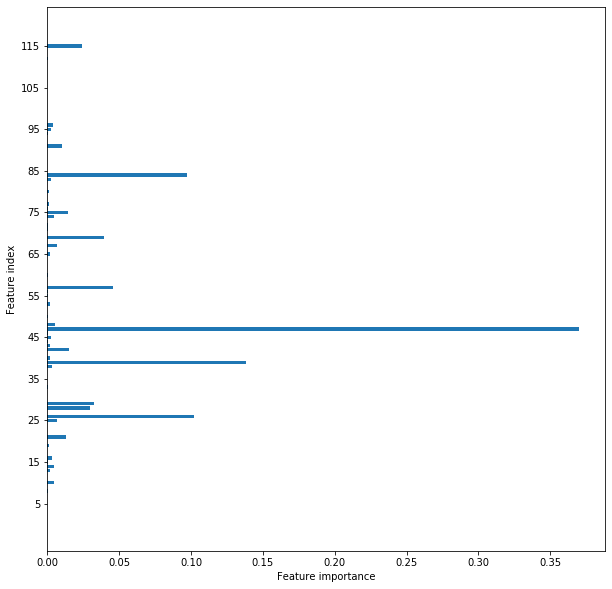

In [3]:
gt = pd.read_csv('../../../dumps/various_sizes/16K.csv')
cols = [col for col in gt.columns if col not in ['label']]
data = gt[cols]
target = gt['label']

data_train, data_test, target_train, target_test = train_test_split(data,target, test_size = 0.20, random_state = 0)

tree = GradientBoostingClassifier(n_estimators=10,max_depth=5,random_state=0) 
tree.fit(data_train, target_train)
n_features = data.shape[1]
plt.rcParams["figure.figsize"] = (10,10)
plt.barh(range(n_features), tree.feature_importances_, align='center') 
plt.yticks(np.arange(5,125,10), np.arange(5,125,10)) 
plt.xlabel("Feature importance")
plt.ylabel("Feature index")

Here we can see that many features have an impact on the decision but a few of them seem to have way more importance. Let's see what we get from selecting the best features for different dataset sizes.

In [9]:
feature_selection('../../../dumps/various_sizes/16K.csv','gradient')

Execution            # features  Features selected      Training set acc    Test acc    Time (s)    Fixed cost (s)
-----------------  ------------  -------------------  ------------------  ----------  ----------  ----------------
Classic                     119  ['f1',...,'f119']              0.991815    0.987843    1.93357            0
K best features              16  ['f22','f26','f27',            0.989086    0.984726    0.487728           1.89083
                                 'f29','f30','f40',
                                 'f43','f48','f49',
                                 'f58','f68','f70',
                                 'f76','f85','f92',
                                 'f116']
Iterative process             8  ['f27','f30','f40',            0.984721    0.981297    0.375944           6.35056
                                 'f43','f48','f58',
                                 'f76','f116']


Here we have a slight decrease of performances but the time savings are enormous ! The loss of precision is therefore acceptable for the time we save (around 4 times faster).

In [6]:
fs_driver('../../../dumps/various_sizes/16K.csv','gradient',[0.005,0.01,0.05,0.1,0.2], False)

Threshold : 0.005000
Execution            # features  Features selected       Training set acc    Test acc    Time (s)    Fixed cost (s)
-----------------  ------------  --------------------  ------------------  ----------  ----------  ----------------
Classic                     119  ['f1',...,'f119']               0.998129    0.995012    6.0933             0
K best features              21  ['f11','f15','f22',             0.997116    0.992207    1.61788            6.04223
                                 'f26','f27','f29',
                                 'f30','f39','f40',
                                 'f43','f48','f49',
                                 'f58','f66','f68',
                                 'f70','f76','f85',
                                 'f92','f116','f117']
Iterative process             9  ['f27','f29','f30',             0.995479    0.989713    0.805404          25.8388
                                 'f40','f43','f48',
                                 'f58','

[['K best features',
  array(['f11', 'f15', 'f22', 'f26', 'f27', 'f29', 'f30', 'f39', 'f40',
         'f43', 'f48', 'f49', 'f58', 'f66', 'f68', 'f70', 'f76', 'f85',
         'f92', 'f116', 'f117'], dtype=object),
  260.4960299323559],
 ['Iterative process',
  ['f27', 'f29', 'f30', 'f40', 'f43', 'f48', 'f58', 'f76', 'f116'],
  162.94619615042006]]

We could reduce our model to only feature 48 while loosing only 4-5% precision but using only 17% of the initial time !

In [37]:
feature_snapshot('../../../dumps/time_analysis/threshold_3/3_20190615_31000.csv','gradient')

/usr/local/lib/python3.7/site-packages/sklearn/feature_selection/_base.py:81: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  UserWarning)
/usr/local/lib/python3.7/site-packages/sklearn/feature_selection/_base.py:81: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  UserWarning)
/usr/local/lib/python3.7/site-packages/sklearn/feature_selection/_base.py:81: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  UserWarning)
/usr/local/lib/python3.7/site-packages/sklearn/feature_selection/_base.py:81: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  UserWarning)
/usr/local/lib/python3.7/site-packages/sklearn/feature_selection/_base.py:81: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  UserWarning)
/usr/local/lib/pytho

K best features : 

Accuracy on training set: 0.984
Accuracy on test set: 0.984
Iterative process : 

Accuracy on training set: 0.984
Accuracy on test set: 0.984
